In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
PROJECT_DATA = '../data/'
cols = ['age','workclass','fnlwgt','education','education-num','marital-status', 'occupation', 'relationship',
        'race', 'sex',  'capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income']
census_income = pd.read_csv(PROJECT_DATA + 'adult.data', names = cols, index_col= False)
census_income.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
census_income.shape

(32561, 15)

In [5]:
#si usamos solo describe nos muestra sólo las variables numéricas
#census_income.describe()
#para que nos muestre aquellas variables que son categóricas añadimos la función
census_income.describe(include = 'object')
#census_income.describe(include = 'number') -> para que nos muestre solo cierto tipo de variables
#tambien podemos usar el metodo exclude para que nos muestre sólo cierto tipo de variables.

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
#si no sabemos qué tipo de variables tiene el dataset, podemos usar: 
census_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
#este ya no es un dataframe, es un tipo Series. Extrae los valores no nulos de una columna
census_income['native-country'].value_counts()
#podemos ver que es typo series haciendo: 
type(census_income['native-country'].value_counts())

pandas.core.series.Series

In [8]:
#si necesito llamar los valores de una columna, le debo pasar a la función una lista con los 
#nombres de las columnas, para así tener igual un dataframe
census_income[['age', 'native-country' ]]
#podemos ver que es dataframe haciendo: 
type(census_income[['age', 'native-country' ]])

pandas.core.frame.DataFrame

In [9]:
#con este codigo creamos una nueva columna si el nombre de la columna no existe ya, y si existe la sobreescribe
census_income['native-country2'] = census_income['native-country']

In [10]:
census_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States


In [11]:
census_income['native-country'].shape

(32561,)

In [12]:
census_income[['native-country']].shape

(32561, 1)

In [13]:
#esta comparacion nos permite ver si las columans son iguales, lo evalua entrada por entrada
#(census_income[['native-country']] == census_income['native-country'])
#(census_income[['native-country']] == census_income['native-country']).sum() nos sirve para ver la suma
#de ellas y no entrada por entrada

In [14]:
#para ver si hay datos nulos usamos
census_income.isnull()
#esta funcion añade falso si el valor por entrada de la matriz no es nulo.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#Podemos ver cuantos datos nulos hay por columna haciendo: 
census_income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
native-country2    0
dtype: int64

In [16]:
#tambien podemos ver cuantos datos nulos hay por fila haciendo
census_income.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Length: 32561, dtype: int64

In [17]:
#le pedimos que nos muestre cuales datos en una columna es diferente de ? ( osea son no nulos)
census_income['native-country'].where(census_income['native-country'] != '?', other = np.nan)
#devuelve una lista de la misma longitud y donde encuentre valores == ? entonces los llena con null,
#ese null lo señalamos como np.nan porque es más estable

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: object

In [18]:
#imprime los valores únicos de la columna
len(census_income['native-country'].unique())

42

In [19]:
#si quiero el número de valores únicos de la lista lo pongo como
census_income['native-country'].nunique()

42

In [20]:
#el dataframe no tiene atributos unique, pero si tiene atributo nunique, la funcionalidad es la misma
#y nos da el número de valores únicos por columna
census_income[['native-country', 'education']].nunique()

native-country    42
education         16
dtype: int64

In [21]:
#le pedimos que guarde en una columna del dataframe la información de la función anterior
census_income['native-country-tr'] = census_income['native-country'].where(census_income['native-country'] != ' ?')

In [22]:
#con esta funcion buscamos el numero de datos que tiene cada entrada de país
#esta función por defecto elimina las variables que son nulas, entonces para que nos las muestre
#añadimos dropna = False, para que nos muestre las variables nulas
census_income['native-country-tr'].value_counts(dropna = False)

 United-States                 29170
 Mexico                          643
NaN                              583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [23]:
census_income['education-tr'] = census_income['education'].where(census_income['education'] != '?', other = np.nan)

In [24]:
census_income['education-tr'].value_counts(dropna = False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education-tr, dtype: int64

In [25]:
#podemos 
census_income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
#quitamos la columna del dataframe que creamos para revisar a través de
census_income.drop('education-tr', axis = 1)
#esto crea otro dataframe y le quita lo que yo quiero quitarle, entonces debemos guardar ese nuevo
#dataframe en un dataframe que yo conozco. Hay dos formas de hacerlo:

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United-States,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United-States,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United-States,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Cuba,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,United-States


In [27]:
#podemos ver lo anterior imprimiendo el dataframe
census_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr,education-tr
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United-States,United-States,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United-States,United-States,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States,United-States,HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United-States,United-States,11th
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Cuba,Cuba,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,United-States,Assoc-acdm
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,United-States,HS-grad
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,United-States,HS-grad
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,United-States,HS-grad


In [28]:
#entonces tenemos dos formas de hacerlo:
census_income = census_income.drop('education-tr', axis = 1)
#o census_income.drop('education-tr', axis = 1, inplace = True) aquí le decimos que el nuevo dataframe
#que construyó y lo ponga en el lugar de mi dataframe usual. 

In [29]:
census_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United-States,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United-States,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United-States,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Cuba,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,United-States


In [30]:
#veamos ahora la siguiente columna
census_income['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [31]:
#Vemos que todavía tiene espacios en blanco entonces podemos quitar esos espacios haciendo:
census_income['race'] = census_income['race'].str.strip()
#str convierte el valor a una string y strip le quita el valor a ambos lados

In [32]:
census_income['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [33]:
#si queremos quitarle el espacio unicamente a la derecha usamos
#census_income['race'] = census_income['race'].str.rstrip()

In [34]:
#si queremos quitarle el espacio unicamente a la izquierda usamos
#census_income['race'] = census_income['race'].str.rstrip()

In [35]:
#el proceso anterior podemos automatizarlo, diciendo que seleccione las columnas del dataframe
#en las que las entradas son de tipo str u object y luego que evalue por cada una de las columnas
for columna in census_income.select_dtypes('object').columns:
    census_income[columna] = census_income[columna].str.strip()

In [36]:
#otra forma de llamar a las columnas pero es muy especifica
#asume que tengo una columna llamada education
#no es buena idea pero sirve para revisar las columnas. Devuelve un series
census_income.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [37]:
#veamos ahora la columna marital-status
census_income['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [38]:
#vamos a cambiar los valores de las variables usando un diccionario: 
dict_marital_status ={
    'Never-married' : 'Single',
    'Married-civ-spouse' : 'Married',
    'Divorced' : 'Single',
    'Married-spouse-absent' : 'Single',
    'Separated' : 'Single',
    'Married-AF-spouse' : 'Single', 
    'Widowed' : 'Single'    
}

In [39]:
#con esta función entonces le pedimos que mapee los valores de la columna a los valores que definimos
#en nuestro diccionario. Sólo sirve para series, entonces si queremos hacerlo sobre Dataframe usamos
#applymap, nos sirve para hacer map sobre filas o sobre columnas
census_income['marital-status'].map(dict_marital_status)


0         Single
1        Married
2         Single
3        Married
4        Married
          ...   
32556    Married
32557    Married
32558     Single
32559     Single
32560    Married
Name: marital-status, Length: 32561, dtype: object

In [40]:
#así mapeamos los valores de las columnas a los valores que queramos cambiar. 
#Sin embargo esto no ha quedado guardado dentro de nuestro dataframe, así que para guardarlo debemos hacer
census_income['marital-status'] = census_income['marital-status'].map(dict_marital_status)
#así cuando llamemos marital-status tendrá los valores que deseamos

In [41]:
census_income['marital-status']

0         Single
1        Married
2         Single
3        Married
4        Married
          ...   
32556    Married
32557    Married
32558     Single
32559     Single
32560    Married
Name: marital-status, Length: 32561, dtype: object

In [42]:
census_income['marital-status'].unique()

array(['Single', 'Married'], dtype=object)

## Transformación de datos

In [44]:
#Muestra el inicio de la tabla, los primeros  5 registros
census_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United-States,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United-States,United-States
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States,United-States
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United-States,United-States
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Cuba,Cuba


In [45]:
#tambien podemos ver el final, usando
census_income.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr
32556,27,Private,257302,Assoc-acdm,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,United-States
32557,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,United-States
32558,58,Private,151910,HS-grad,9,Single,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,United-States
32559,22,Private,201490,HS-grad,9,Single,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,United-States
32560,52,Self-emp-inc,287927,HS-grad,9,Married,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,United-States,United-States


In [47]:
#o podemos usar sample, pero le debemos pasar el numero de filas que quereremos ver
census_income.sample(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr
25058,27,Private,289147,Bachelors,13,Single,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K,United-States,United-States
30024,46,Private,184632,Assoc-voc,11,Married,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K,United-States,United-States
29248,58,Private,172333,HS-grad,9,Married,Sales,Husband,White,Male,7688,0,40,United-States,>50K,United-States,United-States
3299,19,Private,40425,Some-college,10,Single,Sales,Not-in-family,White,Female,0,0,28,United-States,<=50K,United-States,United-States


In [48]:
#este método nos permite ver una descripción de las variables. Por defecto mira las columnas numericas
#pero si queremos mirar las de tipo string, debemos poner describe(include = 'object')
census_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
#si solo quiero que me muestre ciertas columnas, primero seleccionamos las columnas usando doble corchetes
census_income[['age', 'fnlwgt']]
#en esta línea los corchetes de afuera me dicen que seleccione un grupo de columnas, 
#cuando hay solo una, se puede usar solo un corchete (recomendado para cuando le voy a hacer cambios) así:
# census_income['age']
#pero si solo quiero ver las columnas, o usar y ver varias, tengo que poner el doble corchete

,age,fnlwgt
0,39,77516
1,50,83311
2,38,215646
3,53,234721
4,28,338409
...,...,...
32556,27,257302
32557,40,154374
32558,58,151910
32559,22,201490


## Dibujar los datos -> Histograma

<AxesSubplot:>

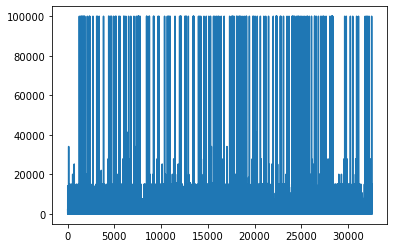

In [51]:
#usando matplotlib
census_income['capital-gain'].plot()

<AxesSubplot:ylabel='Frequency'>

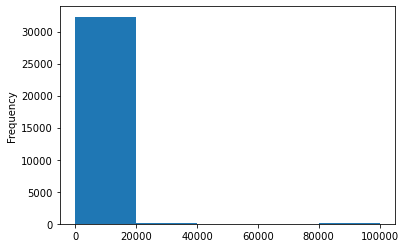

In [52]:
#podemos cambiar los settings de la grafica para que se vea mejor
#recomendamos jugar con los bins para ver los cambios de la gráfica
census_income['capital-gain'].plot(kind = 'hist', bins = 5)

<AxesSubplot:ylabel='Frequency'>

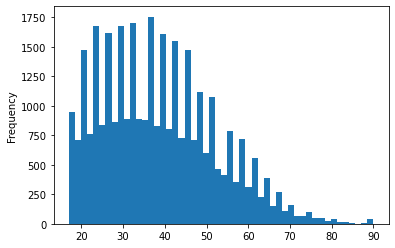

In [58]:
census_income['age'].plot(kind = 'hist', bins = 50)
#aqui vemos que la grafica tiene un sesgo

<AxesSubplot:>

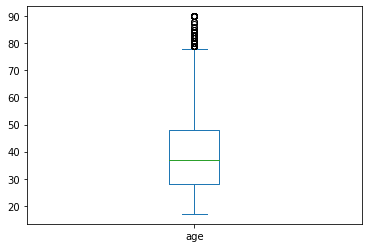

In [61]:
##Veamos otra grafica, que me muestra los percentiles
##el tamaño horizontalmente no importa, pero el tamaño verticalmente es lo que nos da informacion de los datos
#la base de la caja corresponde al percentil 25 (P25), la linea verde al percentil 50 (P50) y la linea superior al percentil 75 (P75)
census_income['age'].plot(kind = 'box')

In [62]:
#Rango intercuartil (IQR) = P75 -Q25
#Bigote inferior = MAX (P25 (percentil 25) - IQR*1.5, min_datos)
#Bigote superior = MIN (P75 (percentil 25) + IQR*1.5, max_datos)
#Los valores que se salen de los bigotes, suelen ser atípicos (OUTLIERS), pero eso no siempre es cierto
#se debe tener cuidado con la eliminación de outliers, en teoría el valor 1.5 debería cambiar 
#en función de la cantidad de datos. 

<AxesSubplot:>

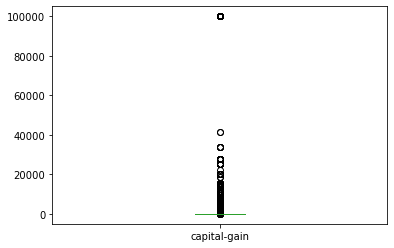

In [63]:
census_income['capital-gain'].plot(kind = 'box')

In [64]:
#¿será que los valores en negrito, son atípicos?

In [65]:
census_income[['capital-gain']].describe()

,capital-gain
count,32561.000000
mean,1077.648844
std,7385.292085
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


In [66]:
#practicamente el 75% de los datos son ceros. 
#a veces los percentiles no nos son de mucha ayuda, entonces elegimos los percentiles que quiero ver
census_income[['capital-gain']].describe(percentiles = [0, .20, .40, .60, .80, .90, 1.0])

,capital-gain
count,32561.000000
mean,1077.648844
std,7385.292085
min,0.000000
0%,0.000000
20%,0.000000
40%,0.000000
50%,0.000000
60%,0.000000
80%,0.000000


In [69]:
#practicamente la mayoria de datos son iguales a cero, queremos ver cuales son diferentes de cero. 
#arriba aprendimos el metodo where, pero aprenderemos otras: 
census_income['not-zero-capital-gain'] = census_income['capital-gain'].where(census_income['capital-gain'] == 0, other = 1)

In [74]:
census_income.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr,not-zero-capital-gain
24109,27,?,194024,9th,5,Single,?,Unmarried,White,Female,0,0,50,United-States,<=50K,United-States,United-States,0
25631,60,Private,205934,HS-grad,9,Single,Other-service,Not-in-family,White,Female,0,0,25,United-States,<=50K,United-States,United-States,0
32370,53,Self-emp-not-inc,137547,Prof-school,15,Single,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,27828,0,40,Philippines,>50K,Philippines,Philippines,1
23106,54,Self-emp-inc,162439,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,98,United-States,>50K,United-States,United-States,0
20225,17,Private,224073,11th,7,Single,Sales,Own-child,White,Male,0,0,20,United-States,<=50K,United-States,United-States,0


In [76]:
#arroja un resultado false true de la comparación
census_income['capital-gain'] == 0

0        False
1         True
2         True
3         True
4         True
         ...  
32556     True
32557     True
32558     True
32559     True
32560    False
Name: capital-gain, Length: 32561, dtype: bool

In [77]:
#podemos guardar esta columna
census_income['not-zero-v2-capital-gain'] = census_income['capital-gain'] == 0

In [79]:
census_income.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,native-country2,native-country-tr,not-zero-capital-gain,not-zero-v2-capital-gain
12069,20,Private,291979,HS-grad,9,Married,Sales,Other-relative,White,Male,0,0,20,United-States,<=50K,United-States,United-States,0,True
32386,59,Federal-gov,23789,HS-grad,9,Married,Sales,Wife,White,Female,0,0,40,United-States,>50K,United-States,United-States,0,True
9703,55,?,52267,Masters,14,Married,?,Husband,White,Male,0,0,18,United-States,<=50K,United-States,United-States,0,True
16603,30,Private,145231,Assoc-acdm,12,Single,Adm-clerical,Own-child,White,Female,0,1762,40,United-States,<=50K,United-States,United-States,0,True
4897,36,Private,398931,Bachelors,13,Married,Prof-specialty,Husband,White,Male,0,1485,50,United-States,>50K,United-States,United-States,0,True


In [80]:
#nueva variable que compara los valores de la columna donde es single
census_income['marital-status-single'] = census_income['marital-status'] == 'Single'

In [81]:
census_income['marital-status-married'] = census_income['marital-status'] == 'Married'

In [83]:
census_income[['marital-status', 'marital-status-single', 'marital-status-married']].head(10)

,marital-status,marital-status-single,marital-status-married
0,Single,True,False
1,Married,False,True
2,Single,True,False
3,Married,False,True
4,Married,False,True
5,Married,False,True
6,Single,True,False
7,Married,False,True
8,Single,True,False
9,Married,False,True


In [86]:
def cambiar_true_false(x):
    if x == True:
        return 1
    else:
        return 0

In [88]:
#Es más lindo si lo pasamos a 1's y 0's
census_income[['marital-status-single', 'marital-status-married']].applymap(lambda x: 1 if x== True else 0)
#otra forma de hacerlo
# (forma 2): census_income[['marital-status-single', 'marital-status-married']].applymap(lambda x: cambiar_true_false(x))
#debemos tener en cuenta que al poner lambda x, le estamos diciendo que tome cada uno de los valores 
# de las columnas que elegimos y evalúe la función que pusimos después del lambda. 
#la podemos escribir como está en la primera opción (recomendable) 
#o la podemos definir antes como en la linea anterior pero es un poco estorboso

,marital-status-single,marital-status-married
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
32556,0,1
32557,0,1
32558,1,0
32559,1,0


In [89]:
#lo que ya conocemos, es (lo ponemos sin comillas porque es un valor booleano
census_income['marital-status-single'].map({True: 1, False: 0})

0        1
1        0
2        1
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    1
32560    0
Name: marital-status-single, Length: 32561, dtype: int64

In [90]:
#veamos otra columna: 
census_income['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [91]:
#crearemos nuevas columnas para cada valor: 
census_income['relationship-Not-in-family'] = census_income['relationship'] == 'Not-in-family'
census_income['relationship-Husband'] = census_income['relationship'] == 'Husband'
census_income['relationship-Wife'] = census_income['relationship'] == 'Wife'
census_income['relationship-Unmarried'] = census_income['relationship'] == 'Unmarried'
census_income['relationship-Own-child'] = census_income['relationship'] == 'Own-child'
census_income['relationship-Other-relative'] = census_income['relationship'] == 'Other-relative'

In [94]:
census_income[['relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']].head()

,relationship-Not-in-family,relationship-Husband,relationship-Wife,relationship-Unmarried,relationship-Own-child,relationship-Other-relative
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,True,False,False,False,False,False
3,False,True,False,False,False,False
4,False,False,True,False,False,False


In [95]:
#transformamos las variables con applymap según lo aprendido antes
census_income[['relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']].applymap(lambda x: 1 if x == True else 0)

,relationship-Not-in-family,relationship-Husband,relationship-Wife,relationship-Unmarried,relationship-Own-child,relationship-Other-relative
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
32556,0,0,1,0,0,0
32557,0,1,0,0,0,0
32558,0,0,0,1,0,0
32559,0,0,0,0,1,0


In [97]:
#aquí podemos ver de nuevo la transformación que hicimos 
#El método que acabamos de ver se llama OneHotEncoder / Variables Dummy
census_income[['relationship','relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']].head(8)

,relationship,relationship-Not-in-family,relationship-Husband,relationship-Wife,relationship-Unmarried,relationship-Own-child,relationship-Other-relative
0,Not-in-family,True,False,False,False,False,False
1,Husband,False,True,False,False,False,False
2,Not-in-family,True,False,False,False,False,False
3,Husband,False,True,False,False,False,False
4,Wife,False,False,True,False,False,False
5,Wife,False,False,True,False,False,False
6,Not-in-family,True,False,False,False,False,False
7,Husband,False,True,False,False,False,False


In [102]:
#le pedimos que sobreescriba las columnas para que tenga efecto los cambios que hicimos arriba
census_income[['relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']] = \
census_income[['relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']].applymap(lambda x: 1 if x == True else 0)

In [103]:
census_income[['relationship','relationship-Not-in-family','relationship-Husband',
               'relationship-Wife','relationship-Unmarried',
               'relationship-Own-child','relationship-Other-relative']].head(8)

,relationship,relationship-Not-in-family,relationship-Husband,relationship-Wife,relationship-Unmarried,relationship-Own-child,relationship-Other-relative
0,Not-in-family,1,0,0,0,0,0
1,Husband,0,1,0,0,0,0
2,Not-in-family,1,0,0,0,0,0
3,Husband,0,1,0,0,0,0
4,Wife,0,0,1,0,0,0
5,Wife,0,0,1,0,0,0
6,Not-in-family,1,0,0,0,0,0
7,Husband,0,1,0,0,0,0


In [104]:
#esto se puede hacer con una función de pandas: 
pd.get_dummies(census_income['relationship']).head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [105]:
#esta función tiene más parametros para que se vea tal y como lo hicimos a mano:
#prefix añade una palabra antes del nombre de la columna
#prefix_sep establece con que signo de puntuación se une el prefix y el nombre de la columna
pd.get_dummies(census_income['relationship'], prefix = 'relationship', prefix_sep = '-' ).head()

,relationship-Husband,relationship-Not-in-family,relationship-Other-relative,relationship-Own-child,relationship-Unmarried,relationship-Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [106]:
#esta forma se usa normalmente para datos numericos nominales ( categorías) porque evita que se le asigne
#informacion adicional (un orden, o una interprtación subjetiva)
#sin embargo no es lo más apropiado cuando las variables tienen muchas categorías
# en ese caso lo mejor es usar embbeddings. (pone un valor entre 0 y 1 a las categorías en vez de 1's u 0's)